In [ ]:
#import necessary packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests
import io

In [ ]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [ ]:
#open image and display
original = Image.open(io.BytesIO(requests.get('https://raw.githubusercontent.com/Pranav-Nagpure/Pan-Card-Tampering-Detection/master/sample_images/original.jpg', stream=True).content))
tampered = Image.open(io.BytesIO(requests.get('https://raw.githubusercontent.com/Pranav-Nagpure/Pan-Card-Tampering-Detection/master/sample_images/tampered.png', stream=True).content))

**Loading original and user provided images.**

In [ ]:
#the file format of source file.
print("Original image format : " ,original.format)
print("Tampered image format : " ,tampered.format)
#iamge size in pixel . the size is given as a 2-tuple(width,height).
print("Original image size : " ,original.size)
print("Tampered image size : " ,tampered.size)

Original image format :  JPEG
Tampered image format :  PNG
Original image size :  (1200, 800)
Tampered image size :  (282, 179)


**Converitng the format of tampering image similar to original image**

In [ ]:
#resize image
original = original.resize((250,160))
print(original.size)
original.save('pan_card_tampering/image/original.jpg')#save image
tampered = tampered.resize((250,160))
print(tampered.size)
# Convert the image to RGB mode before saving as JPEG
tampered = tampered.convert('RGB')
tampered.save('pan_card_tampering/image/tampered.jpg')#save image



(250, 160)
(250, 160)


**here , we check the format and size of the original and tampered image.**

In [ ]:
#change the image type if required from png to jpg.
tampered = Image.open('pan_card_tampering/image/tampered.jpg')
tampered.save('pan_card_tampering/image/tampered.png')#can do png to jpg

**Converting the size of tampered and original image.**

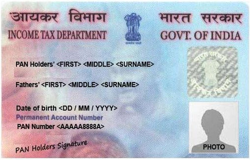

In [ ]:
#display orginal image
original

**Original PAN card image used for comparision.**

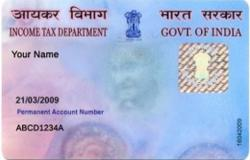

In [ ]:
#display user given image
tampered

User provided which will be compared with PAN card

In [ ]:
#load with the two input images
original = cv2.imread('pan_card_tampering/image/original.jpg')
tampered = cv2.imread('pan_card_tampering/image/tampered.jpg')

**Reading images using opencv.**

In [ ]:
#convert the images to gryascale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

Converting images into gryascale using opencv. because in image processing many applications does'nt help us indentifying the important,edges of coloured images aslo coloured iamges are bit complex to understand by because they have 3 channels while grayscale have 1 channel.

In [ ]:
#compute the structural similarity index between two images , ensuring that diffences iamges is returned
(score,diff) = structural_similarity(original_gray,tampered_gray , full=True)
diff = (diff * 255).astype("uint8")
print("Similarity of the images : ",score)

Similarity of the images :  0.3188497034684784


Structural similarity index help us to determine excatly where in terms of x,y coordinates loaction,the image difference are. here we are trying to find similarity between orginial and tampered image. the lower the SSIM score lower is similarity.

In [ ]:
#calculating threshold and contours
thresh = cv2.threshold(diff , 0,255,cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

here we are using the thresholf function of computer vision which applies an adaptive threshold to the image which is stored in the form array. this function transform the grayscale images into binary image using maths formula.

In [ ]:
#loops over the contours
for c in cnts:
  #applying contours on image
  (x,y,w,h) = cv2.boundingRect(c)
  cv2.rectangle(original,(x,y),(x+w,y+h),(0,0,255),2)
  cv2.rectangle(tampered,(x,y),(x+w,y+h),(0,0,255),2)

Bounding rectangle helps in finding ratio of width to height of bounding rectangle to objects. we compute the bounding box of the contour and then draw the bounding box on both input images to represent where the two images are different or not

original format_image


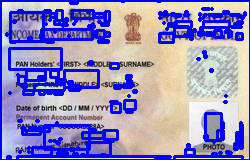

In [ ]:
#display orginal iamges with contour
print('original format_image')
Image.fromarray(original)

tampered format_image


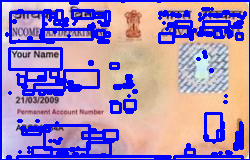

In [ ]:
#display tampered image
print('tampered format_image')
Image.fromarray(tampered)

difference image


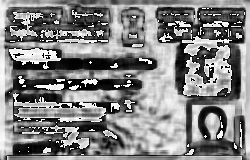

In [ ]:
#display differnce image with black
print('difference image')
Image.fromarray(diff)

Threshold image


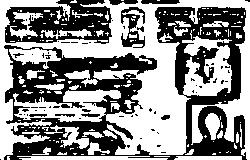

In [ ]:
#display threshold image with white
print('Threshold image')
Image.fromarray(thresh)

**Summary**

as , our SSIM is~31.2% we can say iamge provided is real or fake
